# Χρονοσειρές

Εγκατάσταση βιβλιοθηκών

In [ ]:
install.packages("TSA")
install.packages("fpp2")
install.packages("forecast")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘expsmooth’, ‘fma’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Φορτώνουμε τις απαραίτητες βιβλιοθήκες στο περιβάλλον εργασίας

In [ ]:
library(TSA)
library(fpp2)
library(forecast)
library(ggplot2)

── Attaching packages ────────────────────────────────────────────── fpp2 2.5 ──

✔ fma       2.5     ✔ expsmooth 2.3





In [ ]:
data(airpass)
airpass

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1960,112,118,132,129,121,135,148,148,136,119,104,118
1961,115,126,141,135,125,149,170,170,158,133,114,140
1962,145,150,178,163,172,178,199,199,184,162,146,166
1963,171,180,193,181,183,218,230,242,209,191,172,194
1964,196,196,236,235,229,243,264,272,237,211,180,201
1965,204,188,235,227,234,264,302,293,259,229,203,229
1966,242,233,267,269,270,315,364,347,312,274,237,278
1967,284,277,317,313,318,374,413,405,355,306,271,306
1968,315,301,356,348,355,422,465,467,404,347,305,336
1969,340,318,362,348,363,435,491,505,404,359,310,337


In [ ]:
Οι όροι της χρονοσειράς (τάση, εποχικότητα, τυχαιότητα) με το προσθετικό και πολλαπλασιαστικό μοντέλο

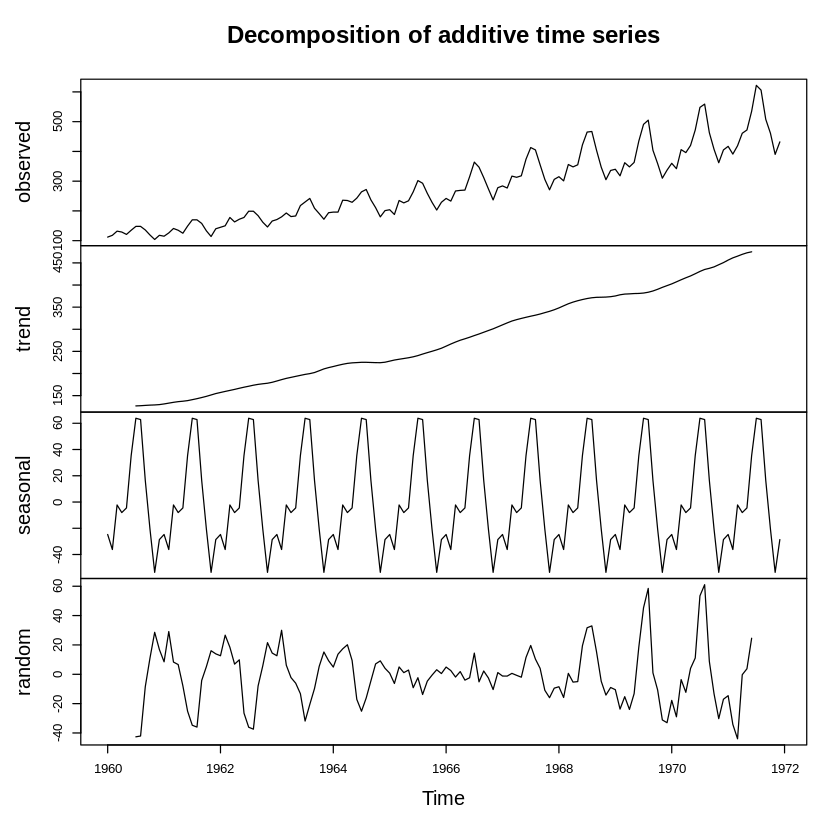

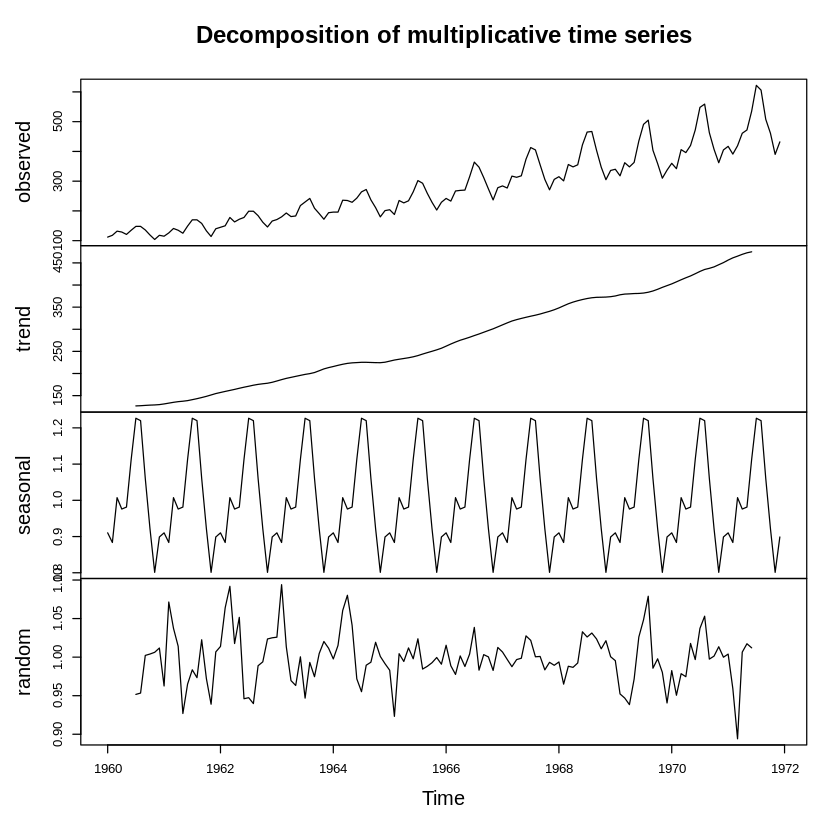

In [ ]:
plot(decompose(airpass, type = 'additive')) #returns additive components
plot(decompose(airpass, type = 'multiplicative')) #returns multiplicative components

Κινητός μέσος για k=3 και k=5

In [ ]:
data(elecsales) #load the dataset

ma_side1 = filter(elecsales, filter = rep(1/3, 3), method = 'convolution', sides = 1)
ma_side2 = filter(elecsales, filter = rep(1/5, 5), method = 'convolution', sides = 1)
ma_side1


A Time Series:
 [1]       NA       NA 2350.857 2389.073 2391.200 2474.850 2510.427 2635.970
 [9] 2727.647 2869.307 2984.433 3155.433 3180.433 3204.600 3159.300 3192.800
[17] 3276.133 3378.093 3531.990 3606.790

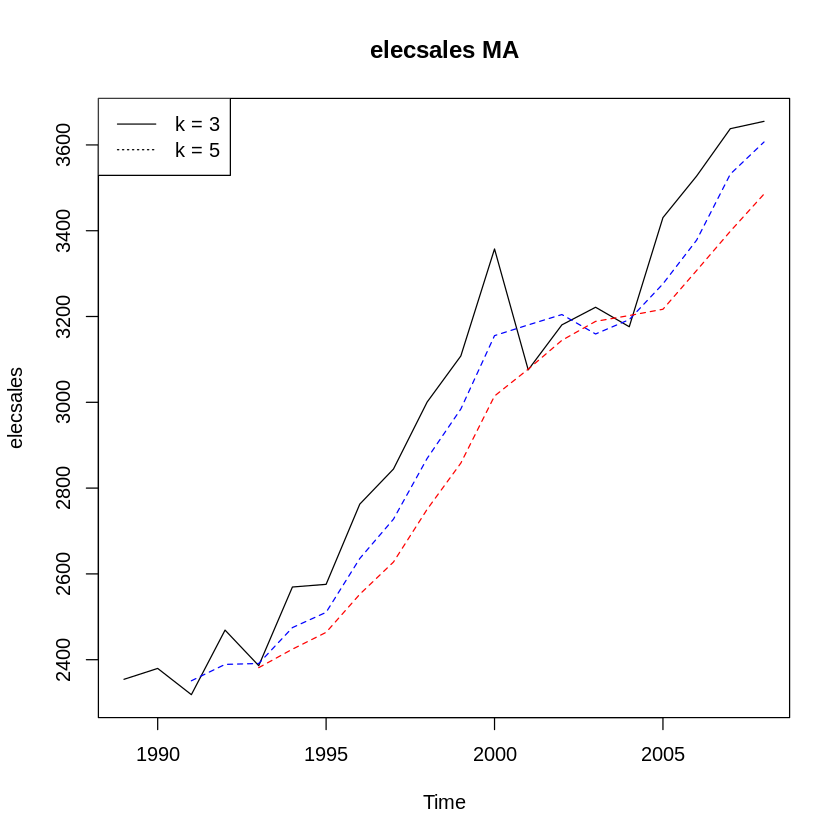

In [ ]:
plot(elecsales, main = 'elecsales MA')
lines(ma_side1, lty = 2, lwd = 1, col = 'blue')
lines(ma_side2, lty = 2, lwd = 1, col = 'red')

legend("topleft", legend = c('k = 3', 'k = 5'), lty = c(1, 3))

## Κινητός μέσος 

In [ ]:
forecast::ma(elecsales,5)

A Time Series:
 [1]       NA       NA 2381.530 2424.556 2463.758 2552.598 2627.700 2750.622
 [9] 2858.348 3014.704 3077.300 3144.520 3188.700 3202.320 3216.940 3307.296
[17] 3398.754 3485.434       NA       NA

Warning message:
“Removed 6 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”


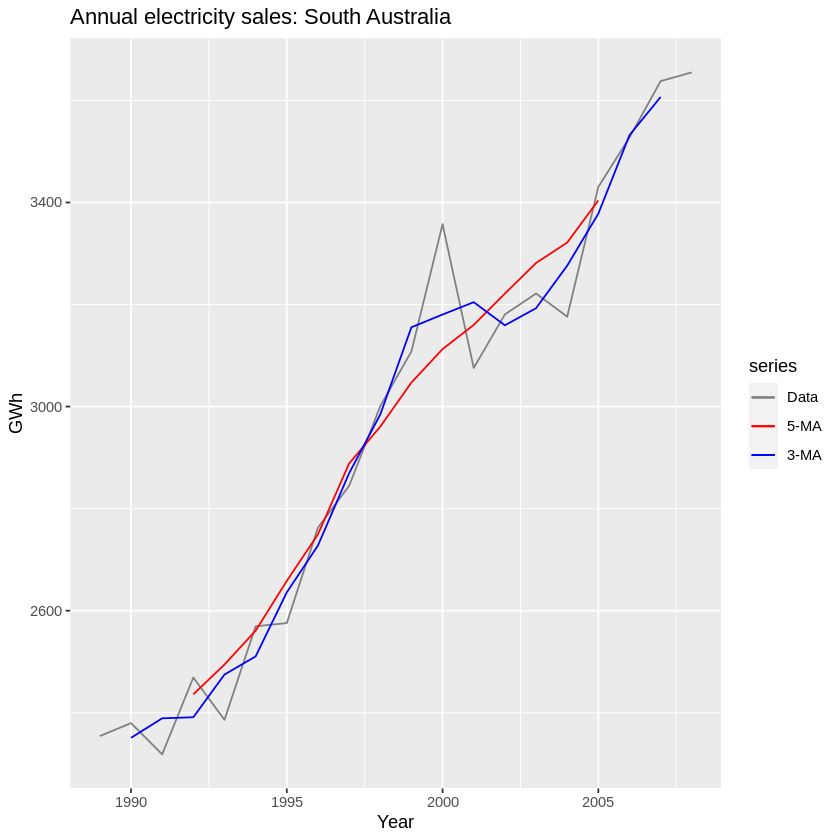

In [ ]:
autoplot(elecsales, series="Data") +
  autolayer(ma(elecsales,7), series="5-MA")+
  autolayer(ma(elecsales,3), series="3-MA")+
  xlab("Year") + ylab("GWh") +
  ggtitle("Annual electricity sales: South Australia") +
  scale_colour_manual(values=c("Data"="grey50","5-MA"="red", "3-MA"="blue"),
                      breaks=c("Data","5-MA","3-MA"))

Πρόβλεψη νε βάση τον κινούμενο μέσο για 

Warning message in ets(object, lambda = lambda, biasadj = biasadj, allow.multiplicative.trend = allow.multiplicative.trend, :
“Missing values encountered. Using longest contiguous portion of time series”


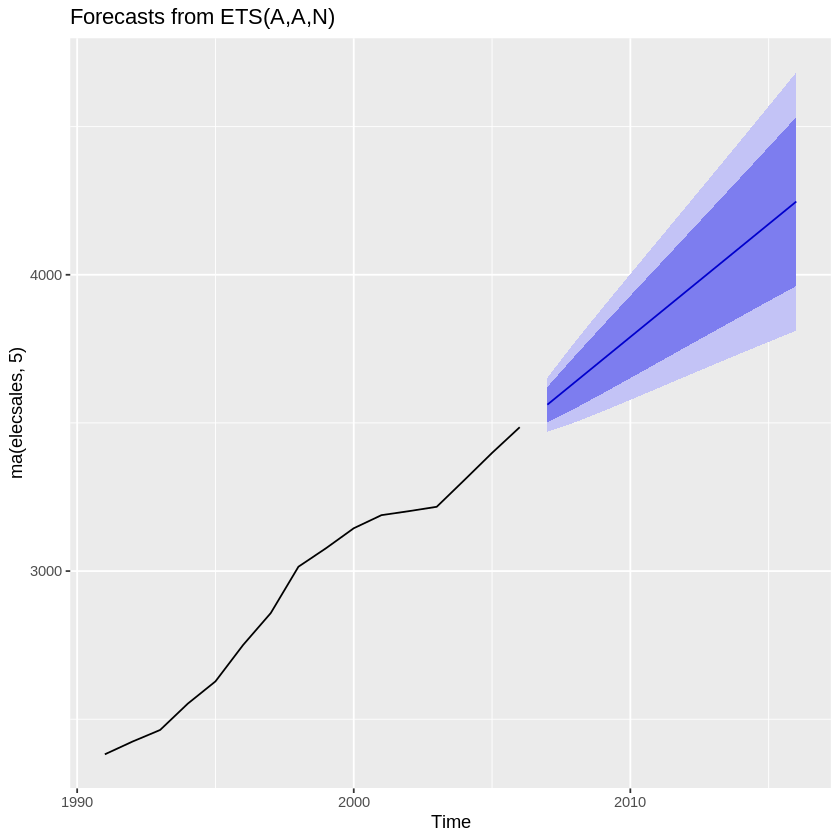

In [ ]:
fc <- forecast(ma(elecsales,5),h=10) # h 	Number of periods for forecasting.
autoplot(fc)

Warning message in ets(object, lambda = lambda, biasadj = biasadj, allow.multiplicative.trend = allow.multiplicative.trend, :
“Missing values encountered. Using longest contiguous portion of time series”


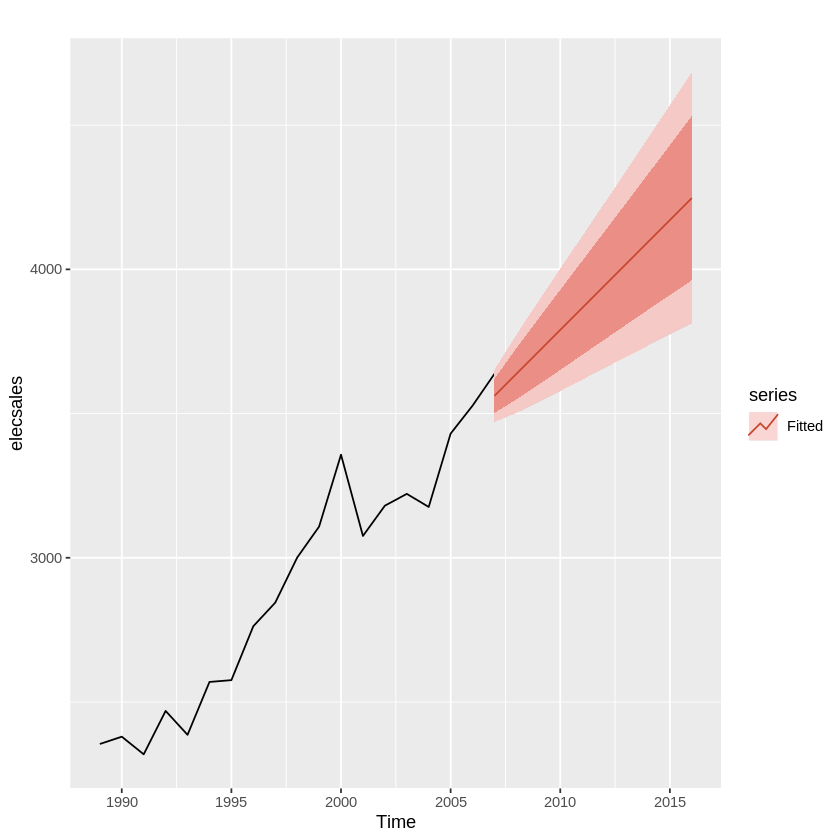

In [ ]:
autoplot(elecsales) +
  autolayer(forecast(ma(elecsales,5),h=10), series="Fitted") 

## Η μέθοδος της εκθετικής εξομάλυνσης

Χρησιμοποιείται συντελεστής βαρύτητας a=0.3 και πρόβλεψη για 10 περιόδους

In [ ]:
ema = ses(elecsales, alpha = 0.3, h = 10)
print(elecsales)
print('---------------------------------------')
print(fitted(ema))
print('---------------------------------------')
print(ema)

Time Series:
Start = 1989 
End = 2008 
Frequency = 1 
 [1] 2354.34 2379.71 2318.52 2468.99 2386.09 2569.47 2575.72 2762.72 2844.50
[10] 3000.70 3108.10 3357.50 3075.70 3180.60 3221.60 3176.20 3430.60 3527.48
[19] 3637.89 3655.00
[1] "---------------------------------------"
Time Series:
Start = 1989 
End = 2008 
Frequency = 1 
 [1] 2438.023 2412.918 2402.956 2377.625 2405.034 2399.351 2450.387 2487.987
 [9] 2570.407 2652.635 2757.054 2862.368 3010.908 3030.345 3075.422 3119.275
[17] 3136.353 3224.627 3315.483 3412.205
[1] "---------------------------------------"
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2009       3485.043 3168.046 3802.041 3000.238 3969.849
2010       3485.043 3154.089 3815.998 2978.892 3991.195
2011       3485.043 3140.696 3829.391 2958.410 4011.677
2012       3485.043 3127.806 3842.281 2938.695 4031.391
2013       3485.043 3115.364 3854.723 2919.668 4050.419
2014       3485.043 3103.328 3866.759 2901.260 4068.827
2015       3485.043 3091.660 3878.427 

Διάγραμμα χρονοσειράς elecsales και της εκθετικής της εξομάλυνσης

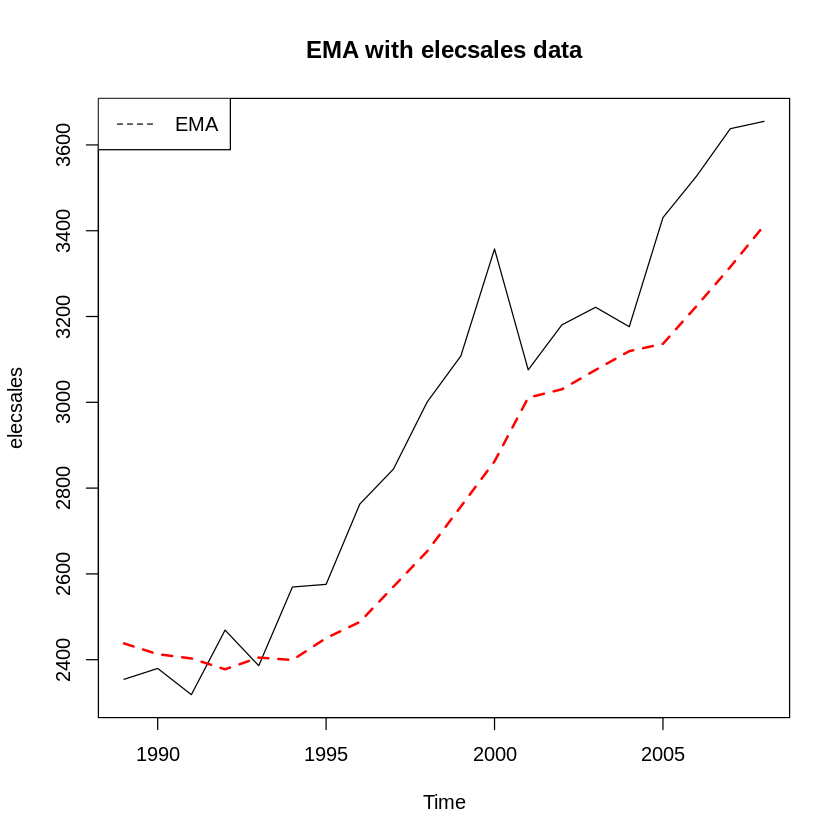

In [ ]:
plot(elecsales, main = 'EMA with elecsales data')
lines(fitted(ema), col = 'red', lty = 2, lwd = 2)
legend("topleft", legend = c('EMA'), lty = c(2))

Διάγραμμα χρονοσειράς elecsales και της πρόβλεψης για h=10

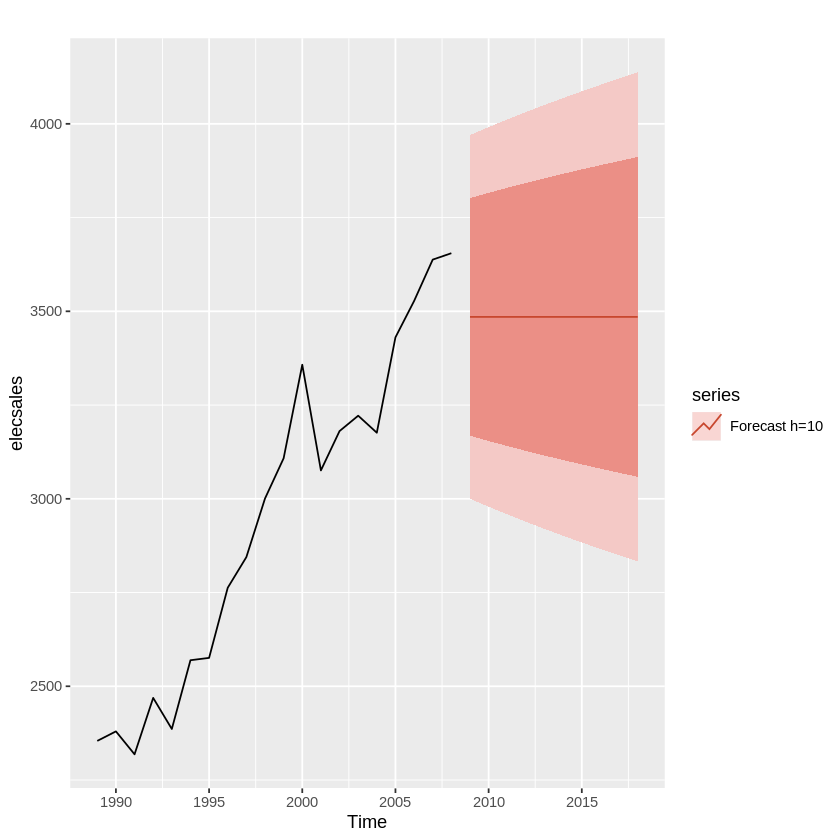

In [ ]:
autoplot(elecsales) +
  autolayer(ema, series="Forecast h=10") 